In [ ]:
                                    SPAM MAIL DETECTION USING Deep Learning IN PYTHON

Step 1:Data Cleaning & Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/spam.csv",encoding='utf-8',encoding_errors='ignore')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#missing values
df.isnull().sum()

,0
Category,0
Message,0


In [ ]:
#check for duplicate values
df.duplicated().sum()

np.int64(415)

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5157, 2)

In [ ]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.columns=['label','text']

In [ ]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['label']=df['label'].map({"ham":0,"spam":1})

<ipython-input-13-d41ddb9f10f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label']=df['label'].map({"ham":0,"spam":1})


In [ ]:
df

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


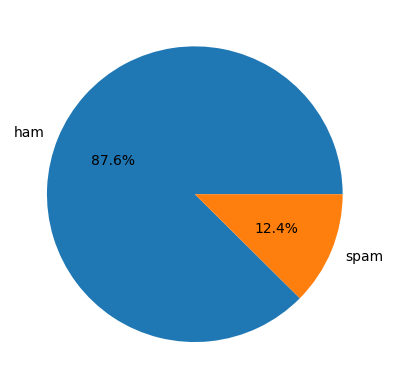

In [ ]:
plt.pie(df['label'].value_counts(), labels = ['ham','spam'],autopct="%1.1f%%")
plt.show()

<ipython-input-16-60757da1229b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette="viridis")


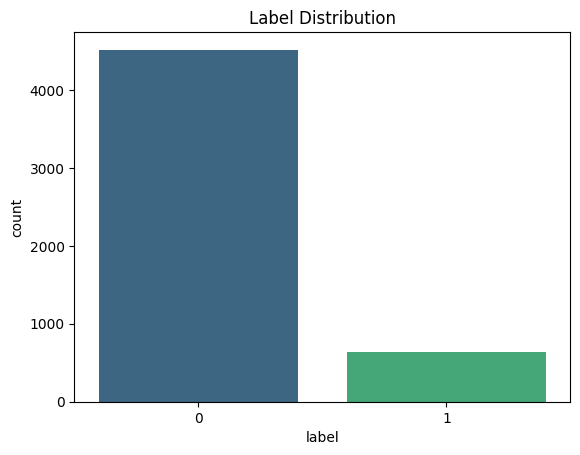

In [ ]:
sns.countplot(x='label', data=df, palette="viridis")
plt.title("Label Distribution")
plt.show()

In [ ]:
# prompt: if 'feature2' not in df.columns:
#     df['feature2'] = np.random.rand(len(df))
# df['text_length'] = df['text'].apply(len)
# sns.pairplot(df, hue='label', vars=['text_length','feature2'])
# plt.suptitle('Pairwise Relationships', y=1.02)
# plt.show() explain a plot for presentation short way in words

This pair plot visualizes the relationship between text length, feature2, and the spam/ham label.  Each point represents a message, colored by its label.  It helps to see if text length or feature2 is predictive of spam.


<ipython-input-17-04a125f8a81f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['feature2'] = np.random.rand(len(df))
<ipython-input-17-04a125f8a81f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['text'].apply(len)


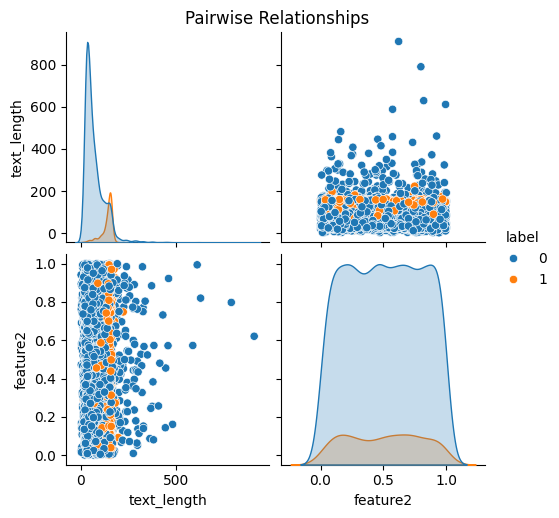

In [ ]:
if 'feature2' not in df.columns:
    df['feature2'] = np.random.rand(len(df))

df['text_length'] = df['text'].apply(len)

sns.pairplot(df, hue='label', vars=['text_length','feature2'])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

<ipython-input-18-048587af2b9d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=df, palette='Set2')


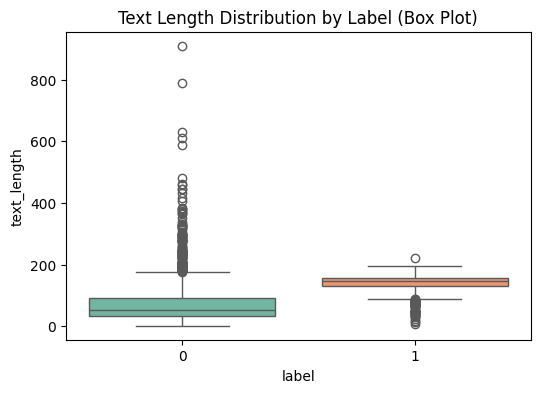

In [ ]:
# Univariate Analysis
plt.figure(figsize=(6,4))
sns.boxplot(x='label', y='text_length', data=df, palette='Set2')
plt.title('Text Length Distribution by Label (Box Plot)')
plt.show()

In [ ]:
# prompt: explain a plot for presentation short way in wordsif 'feature2' not in df.columns:
#     df['feature2'] = np.random.rand(len(df))
# plt.figure(figsize=(6, 4))
# sns.heatmap(df[['text_length','feature2', 'label']].corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show() all most small short way in two line

Visualizes correlations between text length, a random feature ('feature2'), and spam/ham labels using a heatmap.  Shows how strongly these features relate to each other and the target variable.


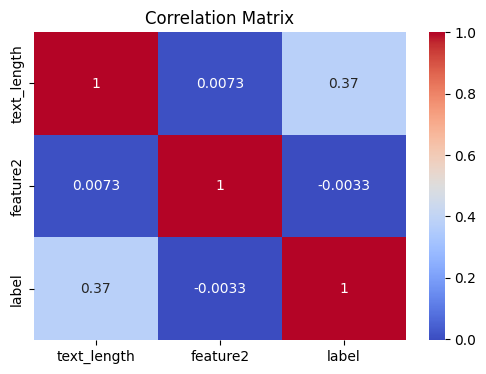

In [ ]:
if 'feature2' not in df.columns:
    df['feature2'] = np.random.rand(len(df))

plt.figure(figsize=(6, 4))
sns.heatmap(df[['text_length','feature2', 'label']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

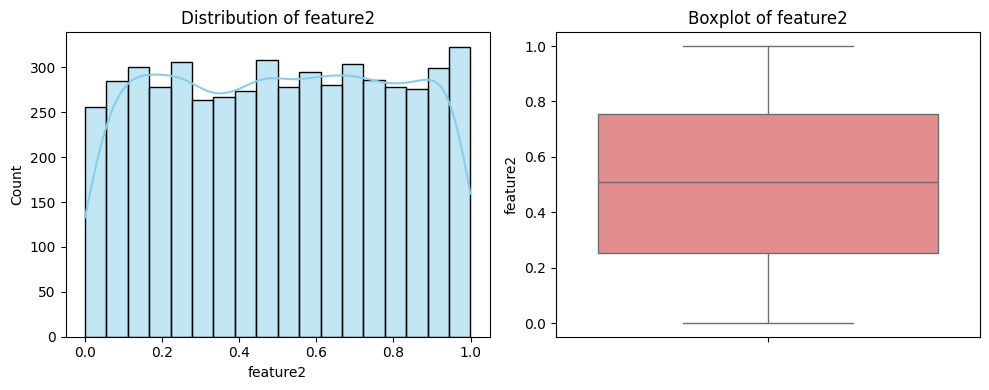

In [ ]:
if 'feature2' in df.columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df['feature2'], kde=True, color='skyblue')
    plt.title('Distribution of feature2')
    plt.subplot(1, 2, 2)
    sns.boxplot(y='feature2', data=df, color='lightcoral')
    plt.title('Boxplot of feature2')
    plt.tight_layout()
    plt.show()

<ipython-input-84-36b097183670>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['text'].apply(len)  # Calculate text length


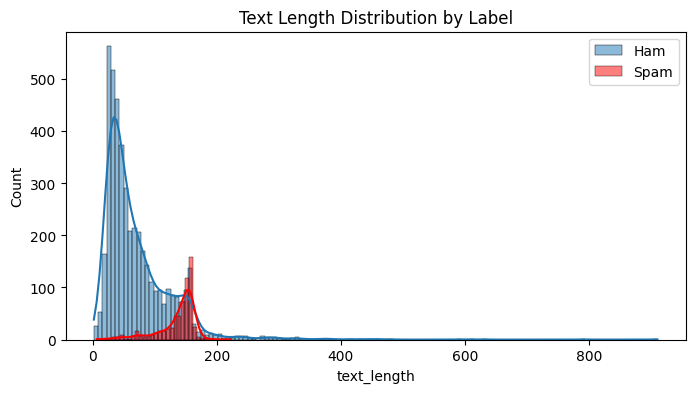

In [ ]:
plt.figure(figsize=(8, 4))
df['text_length'] = df['text'].apply(len)  # Calculate text length
sns.histplot(df[df['label'] == 0]['text_length'], label='Ham', kde=True)
sns.histplot(df[df['label'] == 1]['text_length'], label='Spam', kde=True, color='red')
plt.title('Text Length Distribution by Label')
plt.legend()
plt.show()

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
ham_words = ' '.join(list(df[df['label'] == 0]['text']))
spam_words = ' '.join(list(df[df['label'] == 1]['text']))

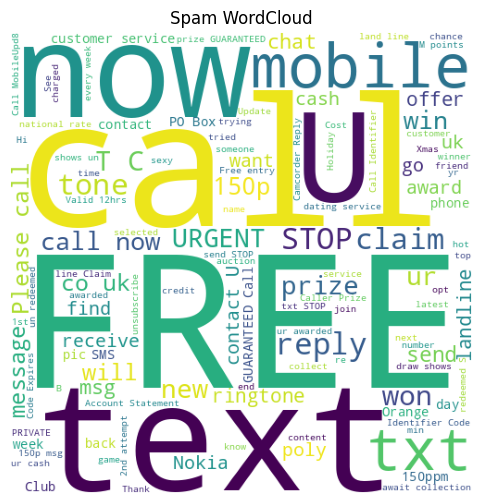

In [ ]:
plt.figure(figsize=(15,6))
wc = WordCloud(width=500,height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(spam_words)
plt.imshow(spam_wc)
plt.title("Spam WordCloud")
plt.axis('off')
plt.show()

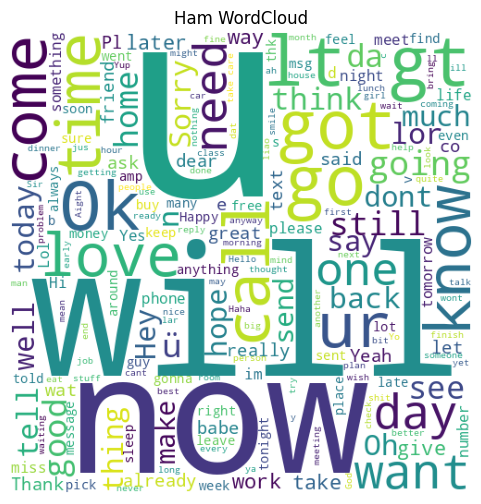

In [ ]:
plt.figure(figsize=(15,6))
ham_wc = wc.generate(ham_words)
plt.imshow(ham_wc)
plt.title("Ham WordCloud")
plt.axis('off')
plt.show()

Step 2: Text Preprocessing

In [ ]:
import nltk
import re
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [ ]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stemmer=PorterStemmer()

In [ ]:
def clean_text(text):
    #convert into lowercase
    text=text.lower()
    #remove URLs
    text=re.sub(r'https?://\S+|www\.\S+','',text)
    #remove HTML Tags
    text=re.sub(r'<.*?>','',text)
    #remove punctution
    text=re.sub(r'[^\w\s]','',text)
    #remove digits
    text=re.sub(r'\d','',text)
    #remove newline characters
    text=re.sub(r'\n','',text)
    return text

In [ ]:
df['clean_text']=df['text'].apply(clean_text)

<ipython-input-30-cc900b3b75b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text']=df['text'].apply(clean_text)


In [ ]:
df

,label,text,feature2,text_length,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",0.343236,111,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,0.040149,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,0.282221,155,free entry in a wkly comp to win fa cup final...
3,0,U dun say so early hor... U c already then say...,0.647846,49,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",0.171804,61,nah i dont think he goes to usf he lives aroun...
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,0.313085,160,this is the nd time we have tried contact u u...
5568,0,Will ü b going to esplanade fr home?,0.410811,36,will ü b going to esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",0.151606,57,pity was in mood for that soany other suggest...
5570,0,The guy did some bitching but I acted like i'd...,0.329141,125,the guy did some bitching but i acted like id ...


Step 3: Train-Test Split & Text Vectorization

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
X=df['clean_text']
y=df['label']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

In [ ]:
# Convert text to sequences
X_train_seq=tokenizer.texts_to_sequences(X_train)
X_test_seq=tokenizer.texts_to_sequences(X_test)


In [ ]:
max_len=100
X_train_pad=pad_sequences(X_train_seq,maxlen=max_len,padding='post')
X_test_pad=pad_sequences(X_test_seq,maxlen=max_len,padding='post')

In [ ]:
X_test_pad

array([[ 177,  360,    1, ...,    0,    0,    0],
       [  21,    3,   53, ...,    0,    0,    0],
       [  11, 2975,  158, ...,    0,    0,    0],
       ...,
       [ 165,  822,  152, ...,    0,    0,    0],
       [ 157,    1,   65, ...,    0,    0,    0],
       [ 116,  187,  565, ...,    0,    0,    0]], dtype=int32)

In [ ]:
X_train_pad

array([[  51, 2118, 3078, ...,    0,    0,    0],
       [  23,   44,   21, ...,    0,    0,    0],
       [   1,   81,    4, ...,    0,    0,    0],
       ...,
       [1950,  121,   58, ...,    0,    0,    0],
       [  35,   16,    2, ...,    0,    0,    0],
       [  81,    1,  937, ...,    0,    0,    0]], dtype=int32)

Step 4: Build ANN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [ ]:
ann_model=Sequential([
    Dense(256,activation='relu',input_shape=(max_len,),kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128,activation='relu',kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64,activation='relu'),
    Dropout(0.3),
    Dense(1,activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,609 (268.00 KB)

 Trainable params: 67,841 (265.00 KB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
history = ann_model.fit(X_train_pad,y_train,epochs=10,batch_size=32,validation_data=(X_test_pad,y_test))


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.8305 - loss: 2.9744 - val_accuracy: 0.8624 - val_loss: 1.8144
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8544 - loss: 1.7025 - val_accuracy: 0.8721 - val_loss: 1.2864
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8686 - loss: 1.2249 - val_accuracy: 0.8760 - val_loss: 0.9805
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8726 - loss: 0.9477 - val_accuracy: 0.8711 - val_loss: 0.7986
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8779 - loss: 0.7715 - val_accuracy: 0.8702 - val_loss: 0.6646
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8776 - loss: 0.6322 - val_accuracy: 0.8789 - val_loss: 0.5789
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8873 - loss: 0.5577 - val_accuracy: 0.8711 - val_loss: 0.5282
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8766 - loss: 0.5046 - val_accura

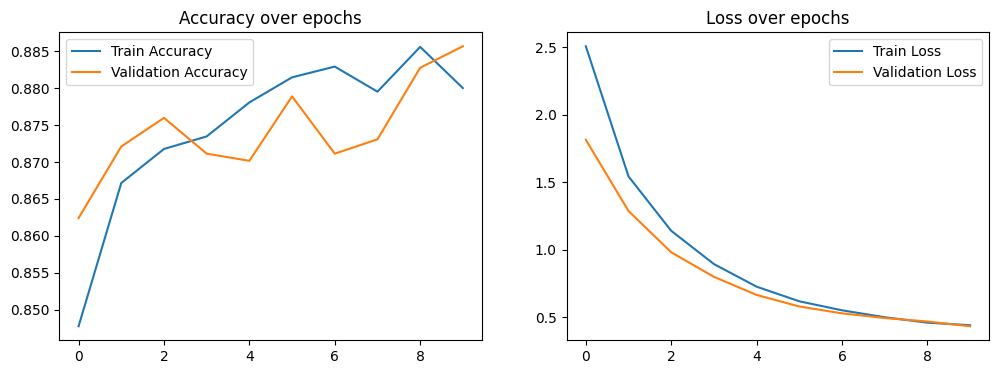

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()

In [ ]:
loss, accuracy=ann_model.evaluate(X_test_pad,y_test)
print(f"Test Accuracy: {accuracy:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8675 - loss: 0.4626
Test Accuracy: 0.8857


CNN Model Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Conv1D,GlobalMaxPooling1D,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
vocab_size=5000
embedding_dim=100
max_len=100

In [ ]:
cnn_model=Sequential([
    Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=max_len),
    Conv1D(filters=128,kernel_size=5,activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
cnn_model.build(input_shape=(None,max_len))
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 96, 128)        │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 572,449 (2.18 MB)

 Trainable params: 572,449 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model.fit(X_train_pad,y_train,epochs=10,batch_size=32,validation_data=(X_test_pad,y_test))


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8278 - loss: 0.4327 - val_accuracy: 0.9845 - val_loss: 0.1003
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9755 - loss: 0.0831 - val_accuracy: 0.9845 - val_loss: 0.0479
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9947 - loss: 0.0227 - val_accuracy: 0.9893 - val_loss: 0.0392
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9989 - loss: 0.0102 - val_accuracy: 0.9874 - val_loss: 0.0462
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9976 - loss: 0.0071 - val_accuracy: 0.9845 - val_loss: 0.0543
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9864 - val_loss: 0.0536
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9995 - loss: 0.0017 - val_accuracy: 0.9874 - val_loss: 0.0584
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9999 - loss: 7.7562e-04 - val_

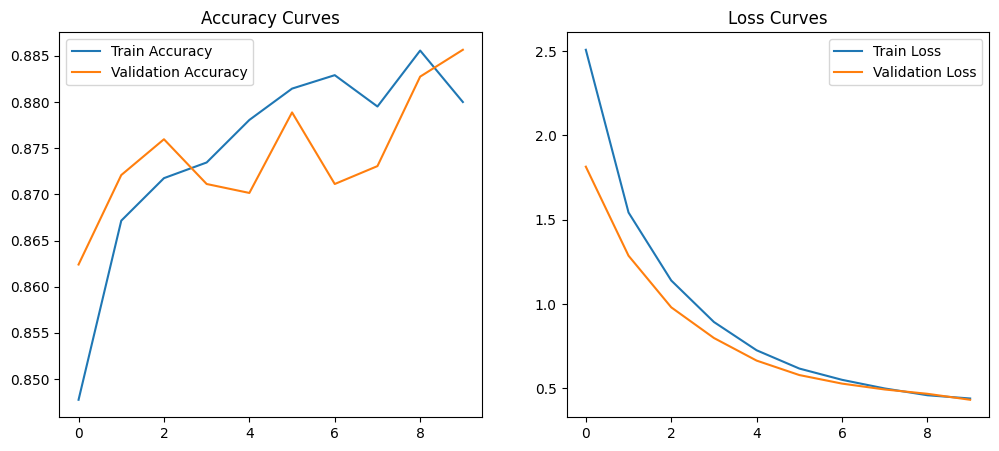

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()

In [ ]:
test_loss,test_acc=ann_model.evaluate(X_test_pad,y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8675 - loss: 0.4626

Test Accuracy: 0.8857
Test Loss: 0.4324


Overfitting CNN Model Architecture

In [ ]:
from tensorflow.keras import regularizers
cnn_model_imp = Sequential([
    Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=max_len),
    Conv1D(filters=128,kernel_size=5,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    GlobalMaxPooling1D(),
    Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [ ]:
cnn_model_imp.compile(optimizer=Adam(learning_rate=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [ ]:
cnn_model_imp.build(input_shape=(None,max_len))
cnn_model_imp.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 100)       │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 96, 128)        │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 572,449 (2.18 MB)

 Trainable params: 572,449 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model_imp.fit(X_train_pad,y_train,epochs=10,batch_size=32,
                  validation_data=(X_test_pad,y_test),
                  callbacks=[early_stopping])

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.8693 - loss: 1.5007 - val_accuracy: 0.8682 - val_loss: 0.5013
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.8968 - loss: 0.4040 - val_accuracy: 0.9758 - val_loss: 0.1865
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9767 - loss: 0.1716 - val_accuracy: 0.9845 - val_loss: 0.1376
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.9890 - loss: 0.1257 - val_accuracy: 0.9845 - val_loss: 0.1260
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9939 - loss: 0.1004 - val_accuracy: 0.9864 - val_loss: 0.1058
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9945 - loss: 0.0814 - val_accuracy: 0.9855 - val_loss: 0.1015
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9957 - loss: 0.0748 - val_accuracy: 0.9845 - val_loss: 0.1056
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.9961 - loss: 0.0739 - val_accu

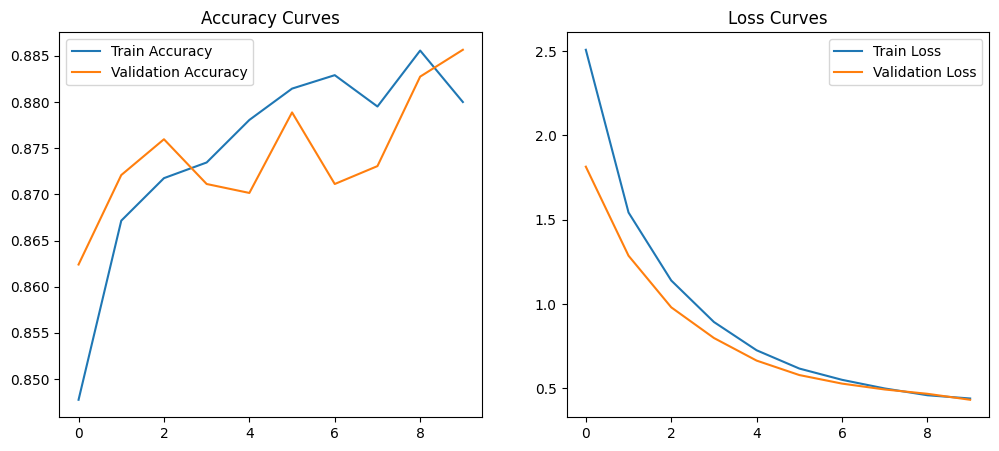

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()

In [ ]:
test_loss,test_acc=cnn_model_imp.evaluate(X_test_pad,y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9879 - loss: 0.0864

Test Accuracy: 0.9884
Test Loss: 0.0811


LSTM Model Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

In [ ]:
vocab_size=5000
embedding_dim=100
max_len=100

In [ ]:
lstm_model=Sequential([
    Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=max_len),
    LSTM(128,return_sequences=True),
    GlobalMaxPooling1D(),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

In [ ]:
lstm_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
lstm_model.fit(X_train_pad,y_train,epochs=10,batch_size=32,
               validation_data=(X_test_pad,y_test),
               callbacks=[early_stopping])

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 29s 196ms/step - accuracy: 0.8594 - loss: 0.4086 - val_accuracy: 0.9254 - val_loss: 0.2130
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 42s 204ms/step - accuracy: 0.9692 - loss: 0.1308 - val_accuracy: 0.9845 - val_loss: 0.0522
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 40s 196ms/step - accuracy: 0.9925 - loss: 0.0333 - val_accuracy: 0.9835 - val_loss: 0.0659
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 30s 236ms/step - accuracy: 0.9968 - loss: 0.0220 - val_accuracy: 0.9835 - val_loss: 0.0755
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 36s 198ms/step - accuracy: 0.9932 - loss: 0.0239 - val_accuracy: 0.9845 - val_loss: 0.0646


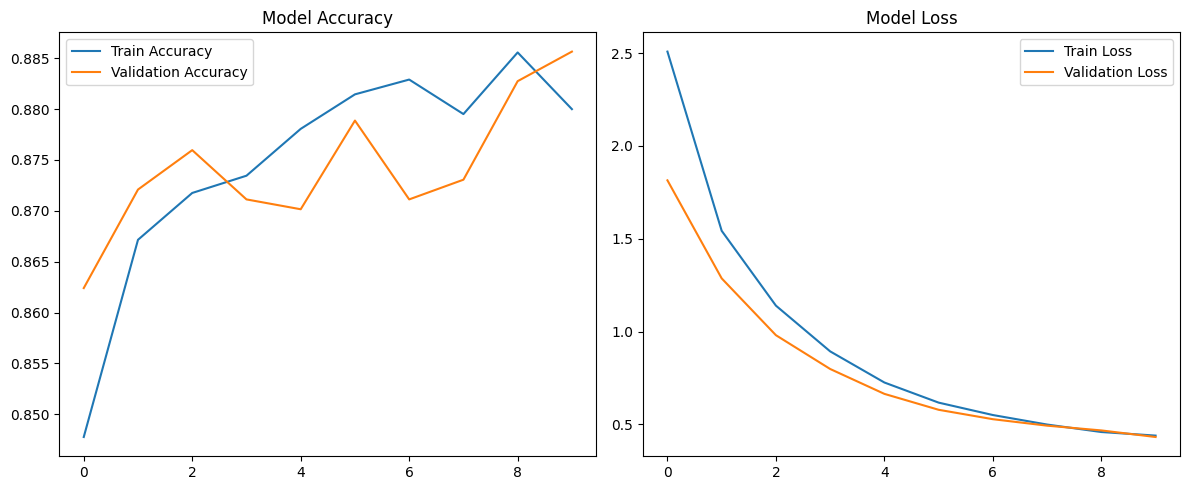

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
lstm_test_loss,lstm_test_acc=lstm_model.evaluate(X_test_pad,y_test)
print(f"\nLSTM Test Accuracy: {lstm_test_acc:.4f}")
print(f"LSTM Test Loss: {lstm_test_loss:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9849 - loss: 0.0549

LSTM Test Accuracy: 0.9845
LSTM Test Loss: 0.0522


Overfitting LSTM Model Architecture

In [ ]:
lstm_model_imp= Sequential([
    Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=max_len),
    LSTM(128,return_sequences=True,kernel_regularizer=regularizers.l2(0.01)),
    GlobalMaxPooling1D(),
    Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

In [ ]:
early_stopping=EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)


In [ ]:
lstm_model_imp.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
lstm_model_imp.build(input_shape=(None,max_len))
lstm_model_imp.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 100)       │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 128)       │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 625,569 (2.39 MB)

 Trainable params: 625,569 (2.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=lstm_model_imp.fit(
    X_train_pad,y_train,
    validation_data=(X_test_pad,y_test),
    epochs=30,
    batch_size=32,
    callbacks=early_stopping,
    verbose=1
)

Epoch 1/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 36s 281ms/step - accuracy: 0.9875 - loss: 0.0968 - val_accuracy: 0.9787 - val_loss: 0.1068
Epoch 2/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 25s 191ms/step - accuracy: 0.9933 - loss: 0.0687 - val_accuracy: 0.9690 - val_loss: 0.1457
Epoch 3/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 30s 232ms/step - accuracy: 0.9784 - loss: 0.1378 - val_accuracy: 0.9738 - val_loss: 0.1403
Epoch 4/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 37s 200ms/step - accuracy: 0.9846 - loss: 0.1110 - val_accuracy: 0.9709 - val_loss: 0.1525


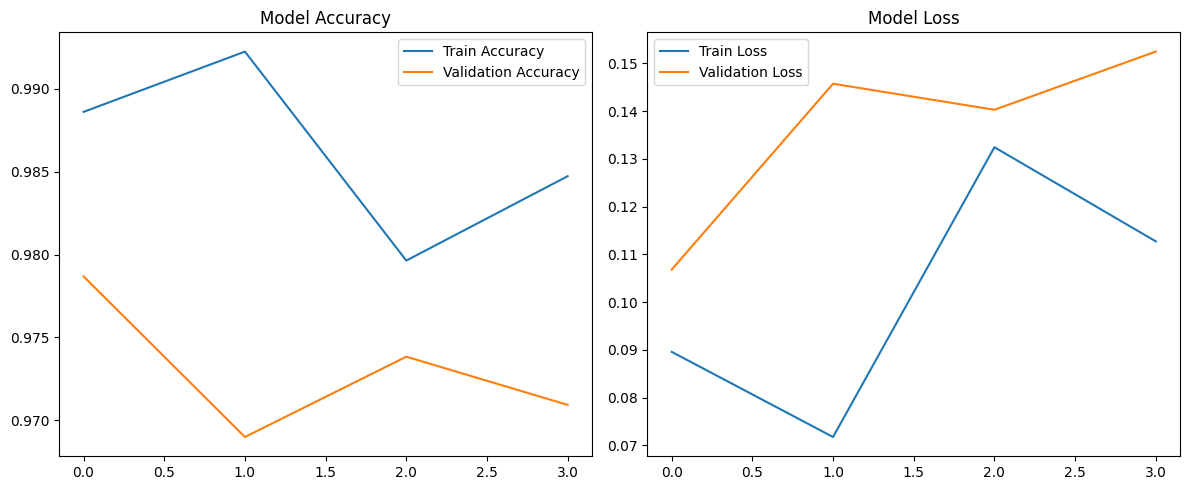

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
lstm_test_loss,lstm_test_acc=lstm_model.evaluate(X_test_pad,y_test)
print(f"\nLSTM Test Accuracy: {lstm_test_acc:.4f}")
print(f"LSTM Test Loss: {lstm_test_loss:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9849 - loss: 0.0549

LSTM Test Accuracy: 0.9845
LSTM Test Loss: 0.0522


In [ ]:
lstm_model.save("lstm_model.keras")